In [26]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from cnn import Conv2D,apply_conv_layers,plot_channels,plot_outputs

Layer 1

In [27]:
"""Layer 1"""
bottem_sobel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]]
)

top_sobel = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

sharpening = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

weighted_averaging_3x3 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])


Layer 2

In [28]:
"""Layer 2"""
robert_x = np.array([
    [1, 0],
    [0, -1]
])

robert_y = np.array([
    [0, 1],
    [-1, 0]
])

averaging_2x2 = np.array([
    [1, 1],
    [1, 1]
])


Layer 3

In [29]:
"""Layer 3"""
gaussian_5x5 = np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
])

averaging_5x5 = np.ones_like(gaussian_5x5) / 25


Stacking Filters

In [30]:
# Example usage with a grayscale image
l1_filters = []
l1_filters.append(bottem_sobel.reshape(3,3,1))
l1_filters.append(top_sobel.reshape(3,3,1))
l1_filters.append(sharpening.reshape(3,3,1))
l1_filters.append(weighted_averaging_3x3.reshape(3,3,1))
# l1_weighted_average = []
# l1_weighted_average.append(weighted_averaging_3x3.reshape(3,3,1))

l2_filters = []
l2_filters.append(robert_x.reshape(2,2,1))
l2_filters.append(robert_y.reshape(2,2,1))
l2_filters.append(averaging_2x2.reshape(2,2,1))

l3_filters = []
l3_filters.append(gaussian_5x5.reshape(5,5,1))
l3_filters.append(averaging_5x5.reshape(5,5,1))

layers = [
    {'filters':l1_filters,'stride':1,'padding':'same'},
    {'filters':l2_filters,"stride":2,'padding':'valid'},
    {'filters':l3_filters,"stride":1,'padding':'same'},
]

Convolution On Bengio Photo

In [31]:
bengio_path = 'images/bengio.jpg'
bengio_img = np.array(Image.open(bengio_path))
outputs1 = apply_conv_layers(bengio_img,layers)


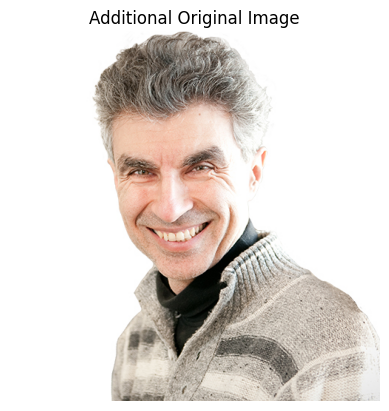

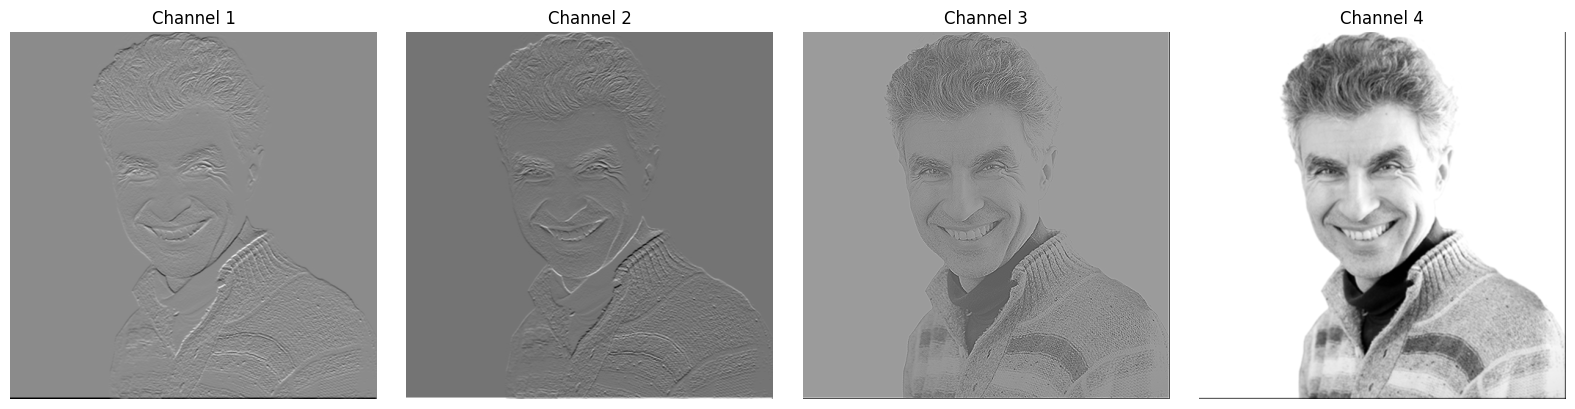

In [32]:
import matplotlib.pyplot as plt

def plot_channels(output):
    num_channels = output.shape[2]
    if num_channels == 3:
        fig, axes = plt.subplots(1, num_channels+1, figsize=(4 * num_channels, 4))
    else:
        fig, axes = plt.subplots(1, num_channels, figsize=(4 * num_channels, 4))
        
    for idx in range(num_channels):
        separated_channels = output[:, :,idx]
        channel = output[:, :, idx] if num_channels > 1 else output
        axes[idx].imshow(channel, cmap='gray')
        axes[idx].set_title(f'Channel {idx+1}')
        axes[idx].axis('off')
    
    if num_channels == 3:
        axes[num_channels].imshow(output,cmap='gray')
        axes[num_channels].set_title("Image")
        axes[num_channels].axis('off')
        
    plt.tight_layout()
    plt.show()


# Plotting the additional original image
plt.imshow(bengio_img)
plt.title("Additional Original Image")
plt.axis('off')
plt.show()

# Calling the plot_channels function
plot_channels(outputs1[0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


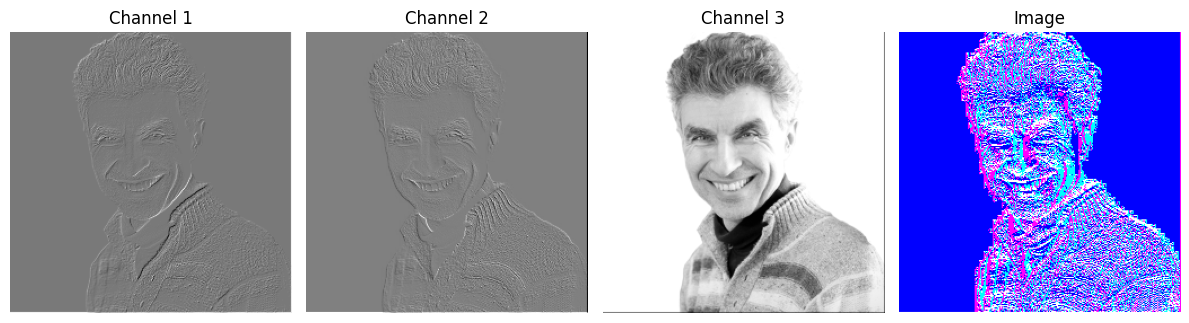

In [33]:
plot_channels(outputs1[1])

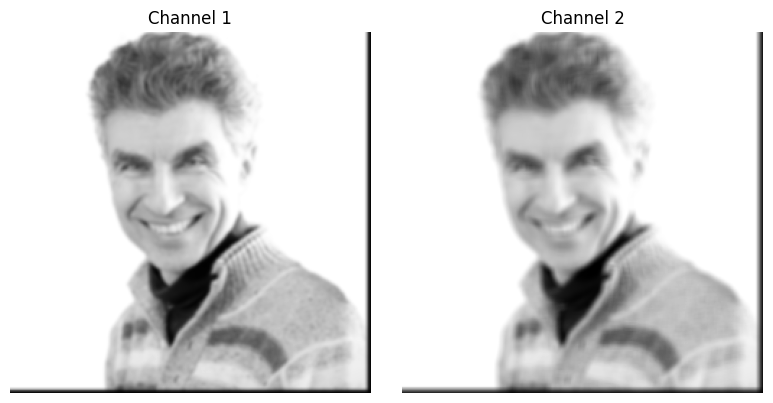

In [34]:
plot_channels(outputs1[2])

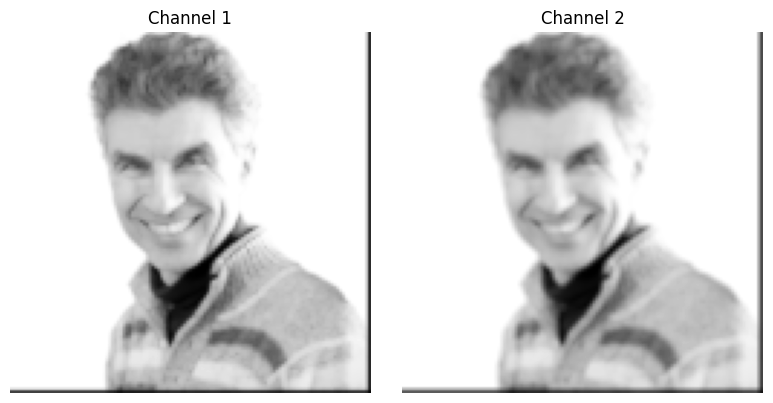

In [35]:
plot_channels(outputs1[3])

In [36]:
goodfellow_path = 'images/goodfellow.png'
goodfellow_img = np.array(Image.open(goodfellow_path).resize((300,300)))
outputs2 = apply_conv_layers(goodfellow_img,layers)

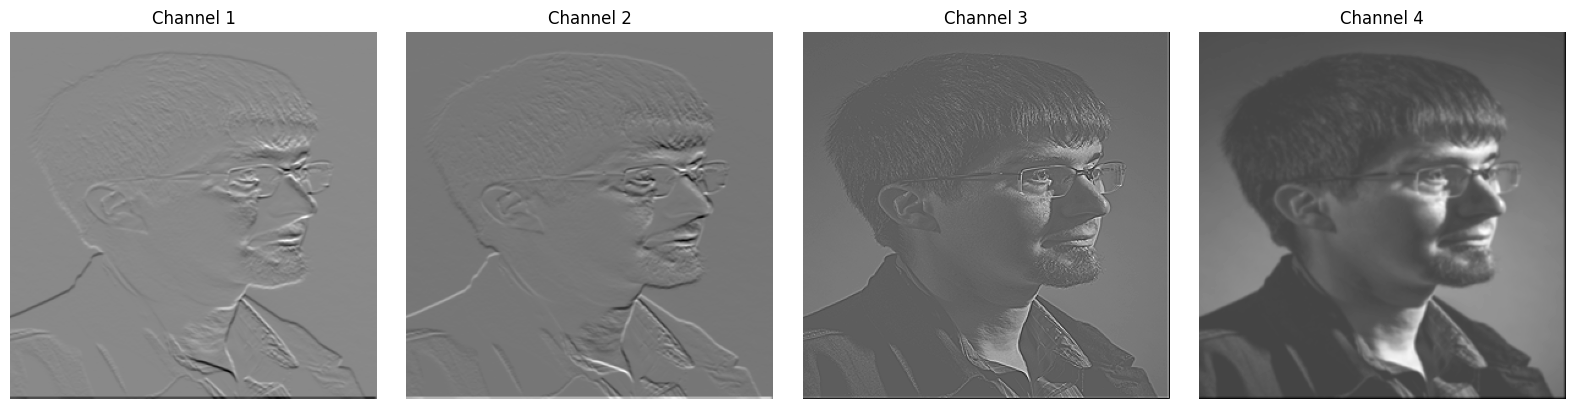

In [37]:
plot_channels(outputs2[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


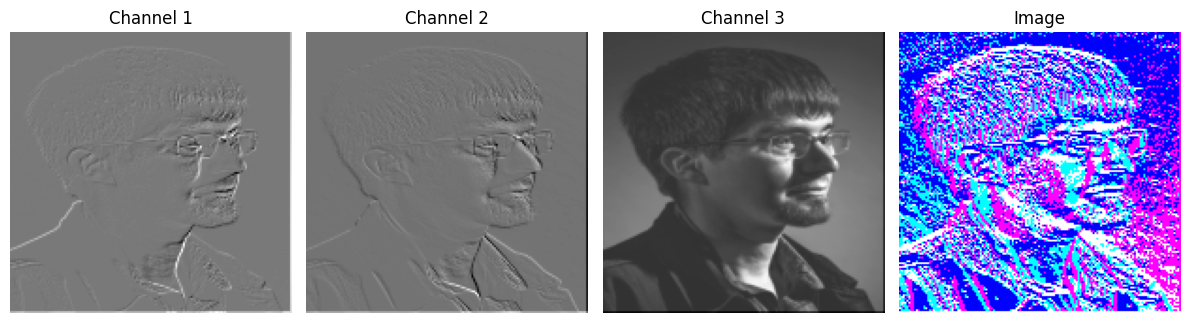

In [38]:
plot_channels(outputs2[1])

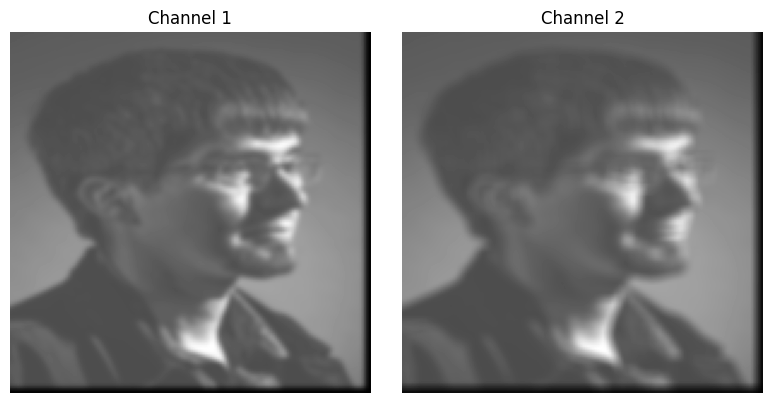

In [39]:
plot_channels(outputs2[2])

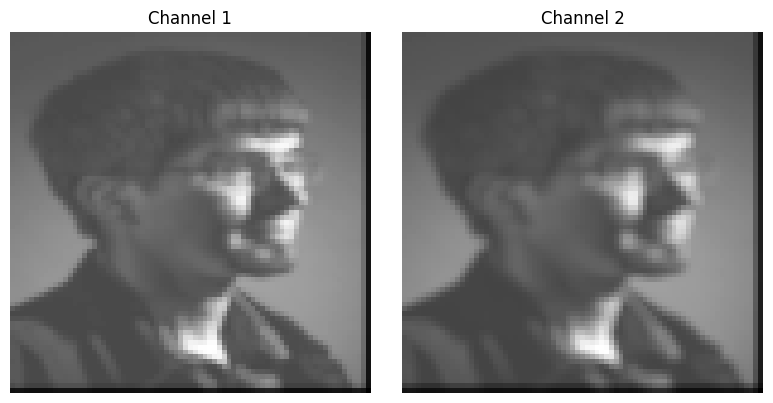

In [40]:
plot_channels(outputs2[3])

In [41]:
hinton_path = 'images/hinton.jpg'
hinton_img = np.array(Image.open(hinton_path).resize((400,400)))
outputs3 = apply_conv_layers(hinton_img,layers)

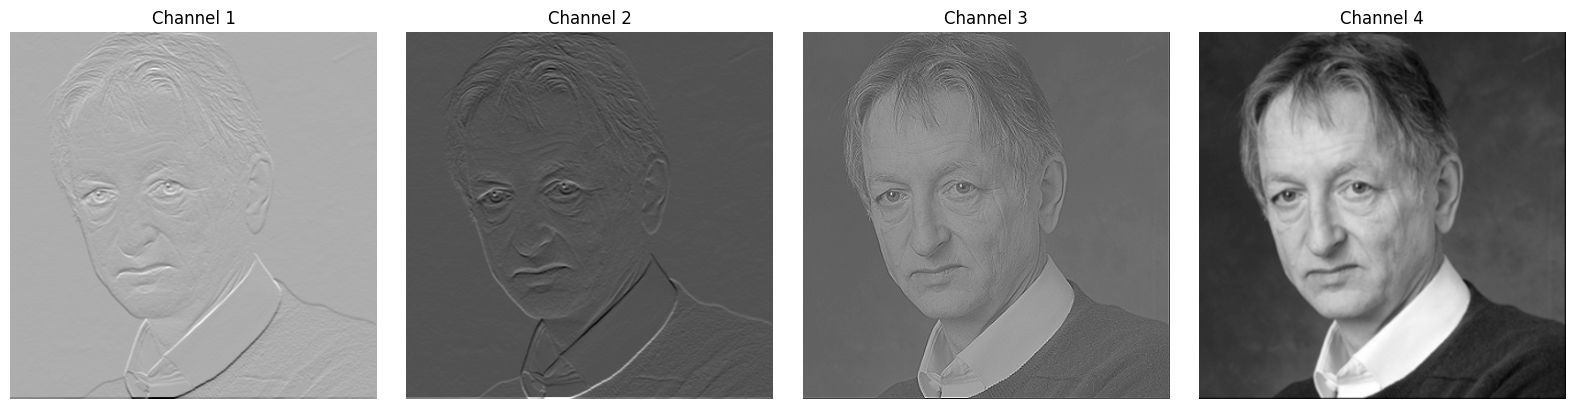

In [42]:
plot_channels(outputs3[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


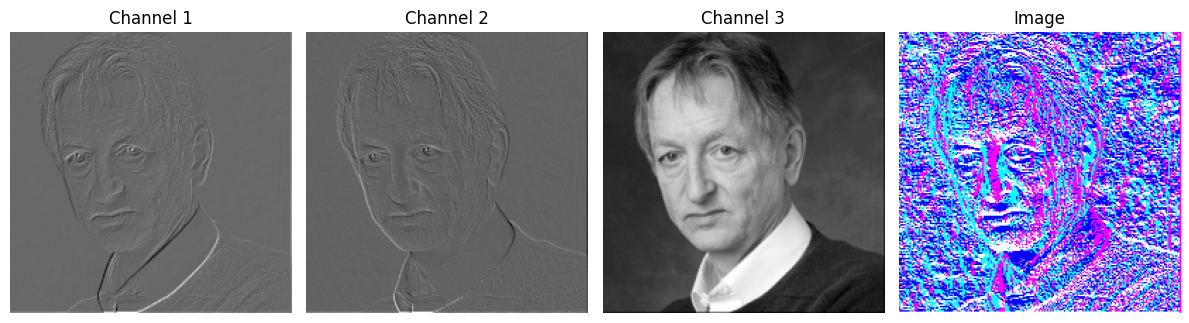

In [43]:
plot_channels(outputs3[1])

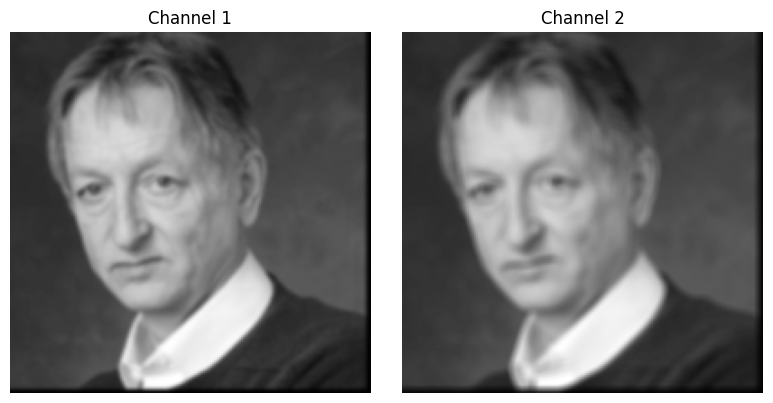

In [44]:
plot_channels(outputs3[2])

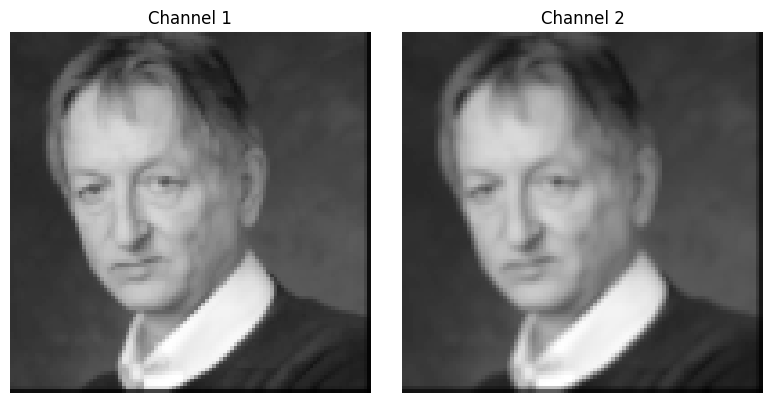

In [45]:
plot_channels(outputs3[3])

In [46]:
lecun_path = 'images/lecun.jpg'
lecun_img = np.array(Image.open(lecun_path).resize((400,400)))
outputs4 = apply_conv_layers(lecun_img,layers)

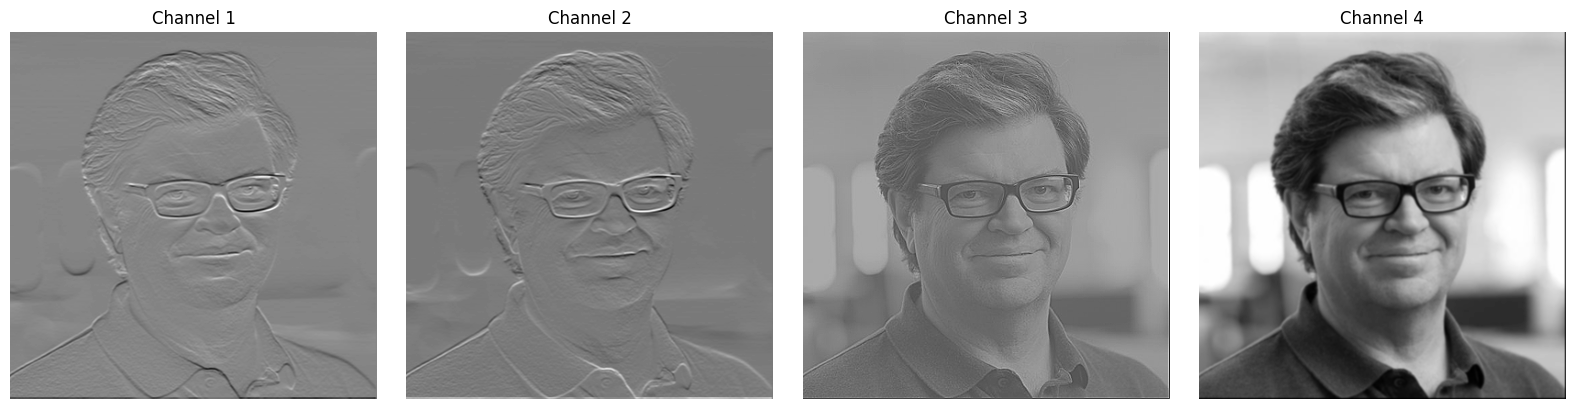

In [47]:
plot_channels(outputs4[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


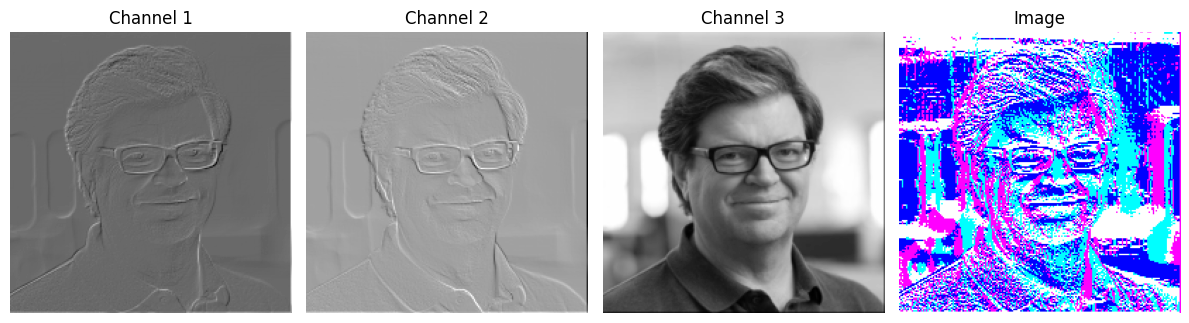

In [48]:
plot_channels(outputs4[1])

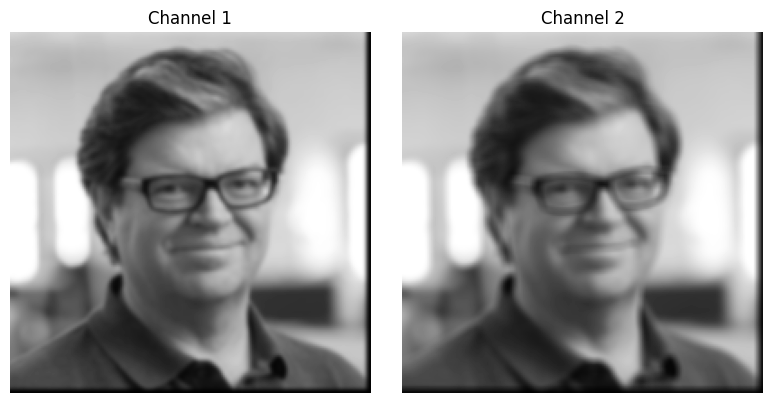

In [49]:
plot_channels(outputs4[2])

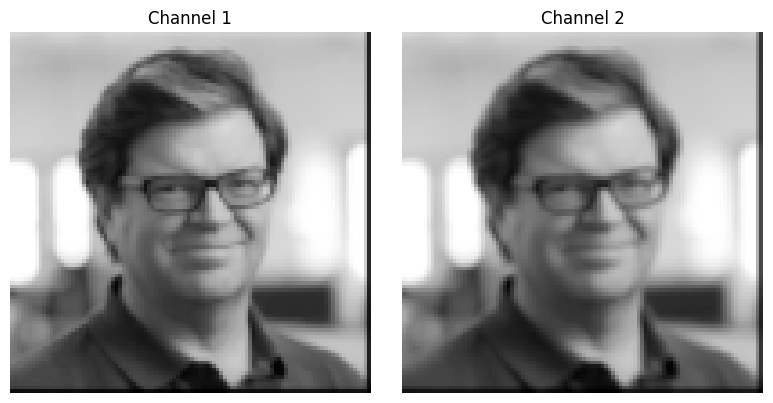

In [50]:
plot_channels(outputs4[3])